In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
cols = [f'Pattern{x}' for x in range(1,61)]
cols.append('Label')

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data',names=cols)

In [56]:
data.head()

,Pattern1,Pattern2,Pattern3,Pattern4,Pattern5,Pattern6,Pattern7,Pattern8,Pattern9,Pattern10,Pattern11,Pattern12,Pattern13,Pattern14,Pattern15,Pattern16,Pattern17,Pattern18,Pattern19,Pattern20,Pattern21,Pattern22,Pattern23,Pattern24,Pattern25,Pattern26,Pattern27,Pattern28,Pattern29,Pattern30,Pattern31,Pattern32,Pattern33,Pattern34,Pattern35,Pattern36,Pattern37,Pattern38,Pattern39,Pattern40,Pattern41,Pattern42,Pattern43,Pattern44,Pattern45,Pattern46,Pattern47,Pattern48,Pattern49,Pattern50,Pattern51,Pattern52,Pattern53,Pattern54,Pattern55,Pattern56,Pattern57,Pattern58,Pattern59,Pattern60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pattern1   208 non-null    float64
 1   Pattern2   208 non-null    float64
 2   Pattern3   208 non-null    float64
 3   Pattern4   208 non-null    float64
 4   Pattern5   208 non-null    float64
 5   Pattern6   208 non-null    float64
 6   Pattern7   208 non-null    float64
 7   Pattern8   208 non-null    float64
 8   Pattern9   208 non-null    float64
 9   Pattern10  208 non-null    float64
 10  Pattern11  208 non-null    float64
 11  Pattern12  208 non-null    float64
 12  Pattern13  208 non-null    float64
 13  Pattern14  208 non-null    float64
 14  Pattern15  208 non-null    float64
 15  Pattern16  208 non-null    float64
 16  Pattern17  208 non-null    float64
 17  Pattern18  208 non-null    float64
 18  Pattern19  208 non-null    float64
 19  Pattern20  208 non-null    float64
 20  Pattern21 

In [58]:
data['Label'].unique()

array(['R', 'M'], dtype=object)

In [59]:
data.describe()

,Pattern1,Pattern2,Pattern3,Pattern4,Pattern5,Pattern6,Pattern7,Pattern8,Pattern9,Pattern10,Pattern11,Pattern12,Pattern13,Pattern14,Pattern15,Pattern16,Pattern17,Pattern18,Pattern19,Pattern20,Pattern21,Pattern22,Pattern23,Pattern24,Pattern25,Pattern26,Pattern27,Pattern28,Pattern29,Pattern30,Pattern31,Pattern32,Pattern33,Pattern34,Pattern35,Pattern36,Pattern37,Pattern38,Pattern39,Pattern40,Pattern41,Pattern42,Pattern43,Pattern44,Pattern45,Pattern46,Pattern47,Pattern48,Pattern49,Pattern50,Pattern51,Pattern52,Pattern53,Pattern54,Pattern55,Pattern56,Pattern57,Pattern58,Pattern59,Pattern60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950

## Data Preprocessing

In [0]:
x = data.drop('Label',axis=1)

y = data['Label']

In [0]:
# encode label
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

## Model 1 : Non-scaling


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [0]:
# create model
model = Sequential()
 
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=5,
          verbose=1)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5310
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.5931
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6138
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6552
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6345
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6897
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.6759
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6759
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5729 - accuracy: 0.7310
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7034
Epoch 11/

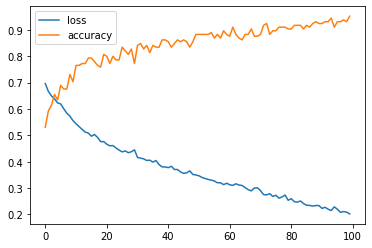

In [72]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

## Model 2 : With Data Preparation

In [0]:
# encode features
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [0]:
# create model
model = Sequential()
 
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=5,
          verbose=1)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.6207
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7793
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8138
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8552
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8966
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9241
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9379
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9655
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9724
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9724
Epoch 11/

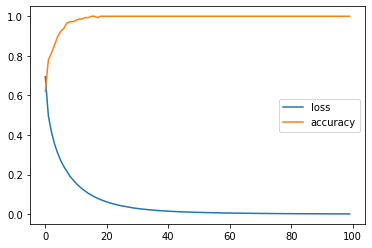

In [83]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

## Model 3 : Evaluate a Smaller Network

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [0]:
# create model
model = Sequential()
 
model.add(Dense(30, input_dim=60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=5,
          verbose=1)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 0.7682 - accuracy: 0.5793
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.6966
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7241
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7724
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8414
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8621
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8759
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.9034
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9241
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9448
Epoch 11/

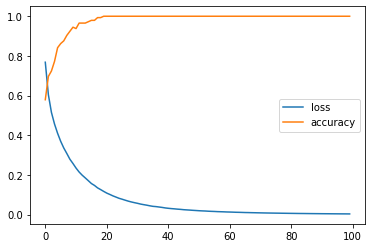

In [93]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

## Model 4 : Evaluate a Larger Network

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [0]:
# create model
model = Sequential()
 
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
 
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_196 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 31        
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


In [102]:
a = model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=5,
          verbose=1)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6276
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7655
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8690
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.9172
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9310
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.9586
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9517
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.9655
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9793
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9862
Epoch 11/

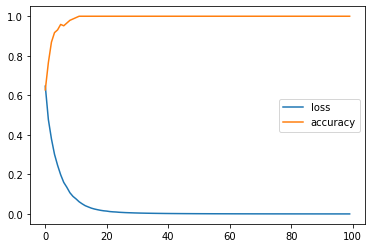

In [103]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()